In [2]:
#communities (SIRD)
import numpy as np

L=3
w=[0.5,0.3,0.2]
A=[[6,2,1],
   [2,3,1],
   [1,1,0.5]]

# time and steps
T=10
dt=0.001
nsteps=round(T/dt)
v_S=[[0,0,0] for t in range(nsteps+1)]
v_I=[[0,0,0] for t in range(nsteps+1)]
v_R=[[0,0,0] for t in range(nsteps+1)]
v_D=[[0,0,0] for t in range(nsteps+1)]

# initial condition
v_S[0]=[0.95,1,1]   #Egymás alatti értékeknek 1-et kell adni
v_I[0]=[0.05,0,0]

# model parameters
beta = 1.2
gamma = 1
mu = 0.001

# SIRD for communities
for t in range(nsteps):
    for l in  range(L): 
         mu = 0.01+v_I[t][l]/10
         v_S[t+1][l]=v_S[t][l]-dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))
         v_I[t+1][l]=v_I[t][l]+dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))-gamma*v_I[t][l]*dt
         v_R[t+1][l]=v_R[t][l]+(1-mu)*gamma*v_I[t][l]*dt
         v_D[t+1][l]=v_D[t][l]+mu*v_I[t][l]*dt

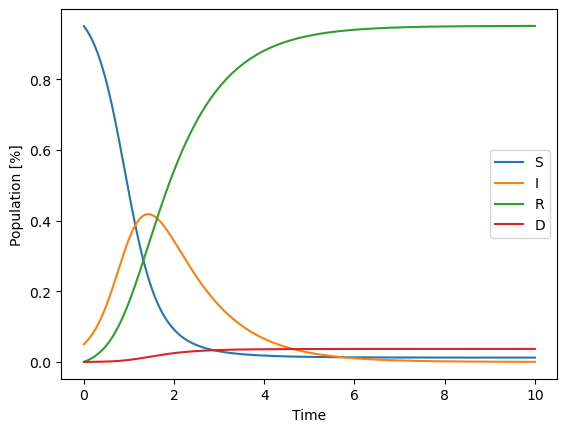

In [3]:
#Diagrams for communities with D
import matplotlib.pyplot as plt

v_Sa=[v_S[t][0] for t in range(nsteps+1)]
#v_Sa
v_Ia=[v_I[t][0] for t in range(nsteps+1)]
#v_Ia
v_Ra=[v_R[t][0] for t in range(nsteps+1)]
#v_Ra
v_Da=[v_D[t][0] for t in range(nsteps+1)]
v_S_data = [0, 0, 0]
v_I_data = [0, 0, 0]
v_R_data = [0, 0, 0]
v_D_data = [0, 0, 0]

for i in range(L):
    v_S_data[i] = [v_S[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_I_data[i] = [v_I[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_R_data[i] = [v_R[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_D_data[i] = [v_D[t][i] for t in range(nsteps+1)]


trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[0],label='S')
plt.plot(trange,v_I_data[0],label='I')
plt.plot(trange,v_R_data[0],label='R')
plt.plot(trange,v_D_data[0],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_communities_1.2_1_0.001_a.png', bbox_inches='tight') #Ábra mentése

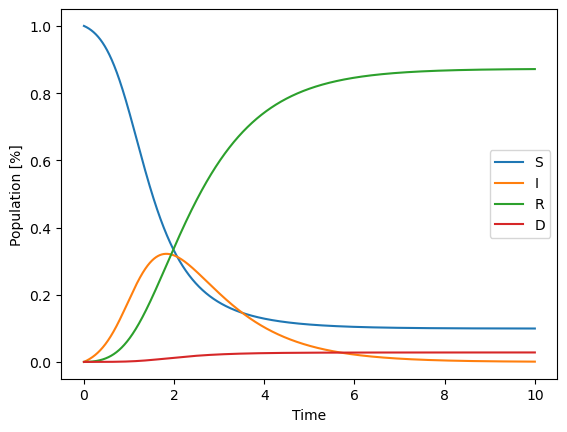

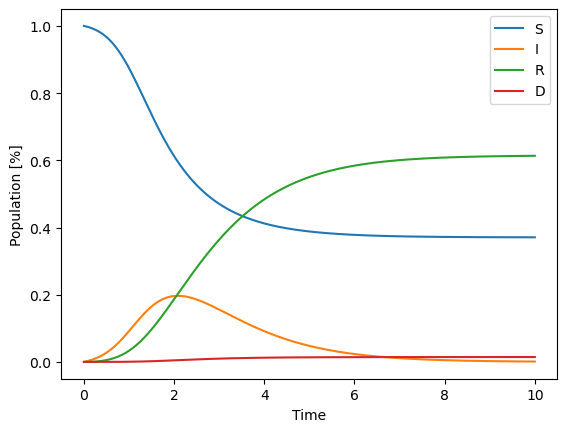

In [4]:
#SIR_D comm diagram b
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[1],label='S')
plt.plot(trange,v_I_data[1],label='I')
plt.plot(trange,v_R_data[1],label='R')
plt.plot(trange,v_D_data[1],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_communities_1.2_1_0.001_b.png', bbox_inches='tight') #Ábra mentése

#SIR_D comm diagram c
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[2],label='S')
plt.plot(trange,v_I_data[2],label='I')
plt.plot(trange,v_R_data[2],label='R')
plt.plot(trange,v_D_data[2],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_communities_1.2_1_0.001_c.png', bbox_inches='tight') #Ábra mentése

In [5]:
#Mérőszámok kinyerése communities-re is  SIRD
print('Total amount of deaths in the ')
for i in range(L):
    print(i, ". community's deaths", format(v_D[nsteps][i]*100, '.3f'), '%')

#Összes fertőzőttek száma (v_I)
infected = [0, 0, 0]
for j in range(L):
    for i in range(nsteps):
        infected[j] += (v_I[i][j]*dt)
    
print('\nTotal amount of infections: ')
for j in range(L):
    print(j, ". community's infections: ", infected[j]*100, " %")

#Maximális megbetegedések száma egyszerre
max_v_I = [0, 0, 0]
for j in range(L):
    for i in range(nsteps):
        if (v_I[i][j] > max_v_I[j]):
            max_v_I[j] = v_I[i][j]
    
print('\nMaximum amount of infected people at the same time: ')
for i in range(L):
    print(i, ". community's amount: ", max_v_I[i]*100, "%")

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = [0.000, 0.000, 0.000]
for j in range(L):
    for i in range(nsteps):
        if(v_I[i][j] > q):
            overloadedtime[j] += dt
        
print('\nLength of time when v_I(t)>t: ')
for i in range(L):
    print(i, ". community's time when v_I(t)>t: ", overloadedtime[i])

Total amount of deaths in the 
0 . community's deaths 3.684 %
1 . community's deaths 2.817 %
2 . community's deaths 1.457 %

Total amount of infections: 
0 . community's infections:  98.7556913753714  %
1 . community's infections:  89.97250912387003  %
2 . community's infections:  62.806508933923524  %

Maximum amount of infected people at the same time: 
0 . community's amount:  41.815642918354065 %
1 . community's amount:  32.17272337550556 %
2 . community's amount:  19.67103485486835 %

Length of time when v_I(t)>t: 
0 . community's time when v_I(t)>t:  4.292999999999768
1 . community's time when v_I(t)>t:  4.4909999999998345
2 . community's time when v_I(t)>t:  4.220999999999744
